In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

file = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d rounakbanik/the-movies-dataset

 93% 212M/228M [00:01<00:00, 214MB/s]
100% 228M/228M [00:01<00:00, 214MB/s]


In [ ]:
! ls

kaggle.json  sample_data  the-movies-dataset.zip


In [ ]:
! unzip the-movies-dataset.zip

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rating_raw = pd.read_csv('/content/ratings.csv')
rating_raw

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
movies_metadata = pd.read_csv('/content/movies_metadata.csv', usecols=['adult', 'genres', 'id', 'original_language', 'original_title', 'overview'])
# adult는 9개뿐, 제목에는 영어 외의 한국어, 중국어등이 포함되어 있음.
movies_metadata

,adult,genres,id,original_language,original_title,overview
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...
45461,False,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,رگ خواب,Rising and falling between a man and woman.
45462,False,"[{'id': 18, 'name': 'Drama'}]",111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...
45463,False,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,False,[],227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis..."


In [ ]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   adult              45466 non-null  object
 1   genres             45466 non-null  object
 2   id                 45466 non-null  object
 3   original_language  45455 non-null  object
 4   original_title     45466 non-null  object
 5   overview           44512 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


In [ ]:
# id에 int가 아닌 행 제거
non_int = []
for i in range(len(movies_metadata.id)):
  try:
    int(movies_metadata.id[i])
    pass
  except:
    non_int.append(i)
movies_metadata.drop(labels=non_int, axis=0, inplace=True)

# id 를 int로 변경
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'])

# overview에 null인 행 제거
movies_metadata = movies_metadata[movies_metadata.overview.notnull()]

# 전체적으로 중복 행 제거
movies_metadata.drop_duplicates()

print(movies_metadata.info())
movies_metadata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44509 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   adult              44509 non-null  object
 1   genres             44509 non-null  object
 2   id                 44509 non-null  int64 
 3   original_language  44499 non-null  object
 4   original_title     44509 non-null  object
 5   overview           44509 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.4+ MB
None


,adult,genres,id,original_language,original_title,overview
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [ ]:
rating_raw

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [ ]:
rating_raw.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
df = pd.merge(rating_raw, movies_metadata, how='left', left_on='movieId', right_on='id')
df.dropna(subset=['userId', 'movieId', 'id', 'overview'], inplace=True)
df

,userId,movieId,rating,timestamp,adult,genres,id,original_language,original_title,overview
0,1,110,1.0,1425941529,False,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",110.0,fr,Trois couleurs : Rouge,Red This is the third film from the trilogy by...
1,1,147,4.5,1425942435,False,"[{'id': 18, 'name': 'Drama'}]",147.0,fr,Les Quatre Cents Coups,"For young Parisian boy Antoine Doinel, life is..."
2,1,858,5.0,1425941523,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858.0,en,Sleepless in Seattle,A young boy who tries to set his dad up on a d...
4,1,1246,5.0,1425941556,False,"[{'id': 18, 'name': 'Drama'}]",1246.0,en,Rocky Balboa,When he loses a highly publicized virtual boxi...
5,1,1968,4.0,1425942148,False,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",1968.0,en,Fools Rush In,Alex Whitman (Matthew Perry) is a designer fro...
...,...,...,...,...,...,...,...,...,...,...
26025338,270896,48780,5.0,1257031830,False,"[{'id': 10769, 'name': 'Foreign'}]",48780.0,en,Boat,A journey into night.
26025340,270896,49530,4.0,1257034436,False,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",49530.0,en,In Time,In the not-too-distant future the aging gene h...
26025347,270896,54001,4.0,1257034331,False,"[{'id': 18, 'name': 'Drama'}]",54001.0,fa,مسافر,The Traveler is a 1974 Iranian drama film dire...
26025349,270896,54503,4.0,1257033886,False,"[{'id': 28, 'name': 'Action'}, {'id': 10769, '...",54503.0,en,Shuang ma lian huan,Lee Yi Min stars as an eager young kung fu stu...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11396980 entries, 0 to 26025353
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   userId             int64  
 1   movieId            int64  
 2   rating             float64
 3   timestamp          int64  
 4   adult              object 
 5   genres             object 
 6   id                 float64
 7   original_language  object 
 8   original_title     object 
 9   overview           object 
dtypes: float64(2), int64(3), object(5)
memory usage: 956.5+ MB


In [ ]:
df.isnull().sum()

userId                0
movieId               0
rating                0
timestamp             0
adult                 0
genres                0
id                    0
original_language    12
original_title        0
overview              0
dtype: int64

In [ ]:
df.sort_values('rating')

,userId,movieId,rating,timestamp,adult,genres,id,original_language,original_title,overview
15164852,157792,186,0.5,1490337420,False,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",186.0,en,Lucky Number Slevin,Slevin is mistakenly put in the middle of a pe...
22046653,228938,1544,0.5,1100417801,False,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",1544.0,en,Imagine Me & You,"During her wedding ceremony, Rachel notices Lu..."
1803723,18681,186,0.5,1175789394,False,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",186.0,en,Lucky Number Slevin,Slevin is mistakenly put in the middle of a pe...
22046662,228938,1917,0.5,1100416566,False,"[{'id': 53, 'name': 'Thriller'}]",1917.0,fr,Qui a tué Bambi ?,"Isabelle, a beautiful nursing student, is star..."
22046663,228938,2085,0.5,1100417667,False,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",2085.0,en,Romeo Must Die,Two warring gang families (one African-America...
...,...,...,...,...,...,...,...,...,...,...
16468636,171196,858,5.0,1166825873,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",858.0,en,Sleepless in Seattle,A young boy who tries to set his dad up on a d...
16468644,171196,2028,5.0,1166825763,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",2028.0,en,Say Anything...,A budding romance between noble underachiever ...
16468659,171197,150,5.0,833962803,False,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",150.0,en,48 Hrs.,A hard-nosed cop reluctantly teams up with a w...
16468604,171195,3034,5.0,1283657846,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na...",3034.0,en,Young Frankenstein,A young neurosurgeon inherits the castle of hi...


#### tokenizer

In [ ]:
# 줄거리 영어를 전처리 해보자
import re
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

eda = []
for row in tokenizer.pipe(movies_metadata.overview):
  before = re.sub(r'\n', ' ', row.text)
  desc = re.sub(r'[^a-z0-9 ]', "", before.lower())
  eda.append(desc)

movies_metadata['token'] = eda
movies_metadata

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,adult,genres,id,original_language,original_title,overview,token
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",led by woody andys toys live happily in his ro...
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,when siblings judy and peter discover an encha...
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,a family wedding reignites the ancient feud be...
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",cheated on mistreated and stepped on the women...
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,just when george banks has recovered from his ...
...,...,...,...,...,...,...,...
45461,False,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,fa,رگ خواب,Rising and falling between a man and woman.,rising and falling between a man and woman
45462,False,"[{'id': 18, 'name': 'Drama'}]",111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,an artist struggles to finish his work while a...
45463,False,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,en,Betrayal,"When one of her hits goes wrong, a professiona...",when one of her hits goes wrong a professional...
45464,False,[],227506,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",in a small town live two brothers one a minist...


In [ ]:
# 줄거리 토큰화 시켜서 padding 300차원으로 맞춰주기
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(3000)
tokenizer.fit_on_texts(movies_metadata.token)
print('tokenizer word index:', len(tokenizer.word_index)) # 빈번하게 사용되는 단어가 1000개인가?

tokenizer word index: 90658


In [ ]:
# input의 각 행 단어를 인덱스로 변환
token_encoded = tokenizer.texts_to_sequences(movies_metadata.token)

In [ ]:
print('movies_metadata.token의 각 행 중 최대 길이 :', max(len(sent) for sent in movies_metadata.token))
max_len = max(len(sent) for sent in token_encoded)
print('token_encoded 각 행 중 최대 길이 max_len:', max_len)

movies_metadata.token의 각 행 중 최대 길이 : 984
token_encoded 각 행 중 최대 길이 max_len: 165


In [ ]:
print(f'Mean length of movies_metadata.token: {np.mean([len(sent) for sent in movies_metadata.token], dtype=int)}')
print(f'Mean length of token_encoded: {np.mean([len(sent) for sent in token_encoded], dtype=int)}')

Mean length of movies_metadata.token: 314
Mean length of token_encoded: 44


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

token_padded = pad_sequences(token_encoded, maxlen=300)

In [ ]:
# # 아래 다른 방법을 사용하면 이거랑 밑에 셀 실행해봐
# import gensim.downloader as api

# wv = api.load('word2vec-google-news-300')

# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # 각 행 인덱스의 길이를 150으로 통일 (pad_sequence, maxlen =150)
# token_padded = pad_sequences(token_encoded, maxlen=300)

# # 임베딩 가중치 행렬 틀 만들기
# vocab_size = len(tokenizer.word_index) + 1
# print('vocab_size:', vocab_size)

# embedding_matrix = np.zeros((vocab_size, 300))
# print('embedding matrix shape:', np.shape(embedding_matrix))

# # tokenizer에 저장되어 있는 임베딩 벡터만 가져와서 위의 임베딩 가중치 행렬에 값 넣기
# def get_vector(word):
#     """
#     해당 word가 word2vec에 있는 단어일 경우 임베딩 벡터를 반환
#     """
#     if word in wv:
#         return wv[word]
#     else:
#         return None
 
# for word, i in tokenizer.word_index.items():
#     temp = get_vector(word)
#     if temp is not None:
#         embedding_matrix[i] = temp

In [ ]:
# token_with_id = pd.DataFrame(token_padded)
# token_with_id['id'] = movies_metadata.id.astype(int)
# token_with_id

(44509, 500)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,id
0,512,15,155,2060,6,8,585,181,1188,477,1607,1,690,2876,5,972,8,197,6,371,2183,120,21,22,1369,1738,3,20,19,408,1,2124,418,361,4,342,19,2199,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,862.0
1,22,2546,3,646,248,14,1315,305,16,1462,1,984,4,2,1059,50,23,2437,1889,14,1276,493,82,693,514,1,305,12,57,33,19,149,585,55,557,12,823,7,4,2200,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8844.0
2,2,47,575,1,643,86,1681,3,2239,2547,226,3,981,486,2,633,1248,1462,2,1198,27,1,154,996,1,2049,18,2548,1,2256,187,21,294,1128,1652,6,130,24,7,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15602.0
3,13,3,13,1,168,26,19,1203,12,1,247,44,4,542,2,5,993,68,3,3,2061,1199,31,45,37,455,4,54,2,644,84,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31357.0
4,115,22,588,25,20,8,788,575,11,1045,1,824,16,294,691,3,16,2948,77,2817,7,257,11,51,1725,13,1527,19,80,21,1005,2,329,16,158,588,52,48,4,362,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44504,2693,3,903,86,2,44,3,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83459.0
44505,14,471,552,4,2200,8,135,61,2,41,2,1396,475,6,8,315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83435.0
44506,22,32,5,10,1466,137,544,2,789,1566,423,36,9,2,553,5,2,850,2086,4,2,948,406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,292656.0
44507,6,2,131,83,155,42,310,32,2,1832,3,1,73,32,2,2527,5,1,18,70,9,8,77,32,3,138,2,837,27,1,984,12,2192,1,837,2322,41,45,1,247,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67687.0


In [ ]:
token_padded = pd.DataFrame(token_padded)
token_padded['id'] = movies_metadata.id.astype(int)
token_padded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,512,15,155,2060,6,8,585,181,1188,477,1607,1,690,2876,5,972,8,197,6,371,2183,120,21,22,1369,1738,3,20,19,408,1,2124,418,361,4,342,19,2199,862.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1889,14,1276,493,82,693,514,1,305,12,57,33,19,149,585,55,557,12,823,7,4,2200,1,305,56,1392,17,45,97,54,210,834,20,1041,235,3,73,1067,1229,8844.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,2239,2547,226,3,981,486,2,633,1248,1462,2,1198,27,1,154,996,1,2049,18,2548,1,2256,187,21,294,1128,1652,6,130,24,7,6,36,2,963,60,9,981,15602.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,3,13,1,168,26,19,1203,12,1,247,44,4,542,2,5,993,68,3,3,2061,1199,31,45,37,455,4,54,2,644,84,4,31357.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,294,691,3,16,2948,77,2817,7,257,11,51,1725,13,1527,19,80,21,1005,2,329,16,158,588,52,48,4,362,9,1,1061,5,139,2,3,2,877,5,8,81,11862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2693,3,903,86,2,44,3,58,83459.0
44505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,471,552,4,2200,8,135,61,2,41,2,1396,475,6,8,315,83435.0
44506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,32,5,10,1466,137,544,2,789,1566,423,36,9,2,553,5,2,850,2086,4,2,948,406,292656.0
44507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,783,1,1021,273,1,1832,52,248,1,268,2068,4,8,216,6,623,1,2894,1832,3,8,167,52,781,6,2,334,392,6,1,3,202,14,52,39,769,20,1,176,67687.0


### 모델 구축

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

df_9, test_01 = train_test_split(df, test_size=0.01, random_state = 100)

In [ ]:
df_9.shape, test_01.shape

((11283010, 10), (113970, 10))

In [ ]:
train, test = train_test_split(test_01, test_size=0.2, random_state = 100)

In [ ]:
train.shape, test.shape

((91176, 10), (22794, 10))

In [ ]:
train.sort_values('id', inplace=True)
test.sort_values('id', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train.head()

,userId,movieId,rating,timestamp,adult,genres,id,original_language,original_title,overview
13477553,140122,2,5.0,999757325,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...
8159963,84125,2,2.5,1075463558,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...
11274806,116955,2,2.0,939659240,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...
17507113,181689,2,5.0,839013067,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...
15001258,156031,2,5.0,844233959,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...


In [ ]:
token_padded.head()

NameError: ignored

In [ ]:
number_of_unique_user = len(test_01.userId.unique())
number_of_unique_movie_id = len(test_01.id)
number_of_unique_user, number_of_unique_movie_id

(66927, 113970)

In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, GlobalAveragePooling1D, LSTM, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
max_featues = 200000
# user_id
user_input = Input(shape=(1,), name='user_input_layer')
user_embedding_layer = Embedding(max_featues, 64, name = 'user_embedding_layer')
user_vector_layer = Flatten(name='user_vector_layer')

# # overview_id
# overview_input = Input(shape=(300,), name='overview_input_layer')
# overview_embedding_layer = Embedding(max_featues, 128, name = 'overview_embedding_layer')
# overview_vector_layer = LSTM(128)
'''
다른 방법
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(GlobalAveragePooling1D()) # 입력되는 단어 벡터의 평균을 구하는 함수입니다.
'''

# movie_id
movie_input = Input(shape=(1,), name='movie_input_layer')
movie_embedding_layer = Embedding(max_featues, 64, name = 'movie_embedding_layer')
movie_vector_layer = Flatten(name='movie_vector_layer')



concate_layer = Concatenate()

dense_layer1 = Dense(128, activation='relu')
dense_layer2 = Dense(64, activation='relu')
dense_layer3 = Dense(32, activation = 'relu')
result_layer = Dense(1)


'''
쌓기
'''
# user_id
user_embedding = user_embedding_layer(user_input)
user_vector = user_vector_layer(user_embedding)

# # overview_id
# overview_embedding = overview_embedding_layer(overview_input)
# overview_vector = overview_vector_layer(overview_embedding)

# movie_id
movie_embedding = movie_embedding_layer(movie_input)
movie_vector = movie_vector_layer(movie_embedding)


concat = concate_layer([user_vector, movie_vector])
dense1 = dense_layer1(concat)
dense2 = dense_layer2(dense1)
dense3 = dense_layer3(dense2)



result = result_layer(dense3)

model = Model(inputs=[user_input,movie_input], outputs=result)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input_layer (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 movie_input_layer (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 user_embedding_layer (Embeddin  (None, 1, 64)       12800000    ['user_input_layer[0][0]']       
 g)                                                                                               
                                                                                                  
 movie_embedding_layer (Embeddi  (None, 1, 64)       12800000    ['movie_input_layer[0][0]']

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input_layer (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 movie_input_layer (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 overview_input_layer (InputLay  [(None, 500)]       0           []                               
 er)                                                                                              
                                                                                                  
 user_embedding_layer (Embeddin  (None, 1, 64)       12800000    ['user_input_layer[0][0]'] 

In [ ]:
train.head()

,userId,movieId,rating,timestamp,adult,genres,id,original_language,original_title,overview
13477553,140122,2,5.0,999757325,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...
8159963,84125,2,2.5,1075463558,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...
11274806,116955,2,2.0,939659240,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...
17507113,181689,2,5.0,839013067,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...
15001258,156031,2,5.0,844233959,False,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",2.0,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...


In [ ]:
train.userId

13477553    140122
8159963      84125
11274806    116955
17507113    181689
15001258    156031
             ...  
10630762    109709
18476119    191742
21111303    219341
717658        7287
13506487    140405
Name: userId, Length: 91176, dtype: int64

#### input data 준비하기

In [ ]:
train = train.sort_values('id')

train_user_input = train.userId
train_movie_input = train.id

train_movie_input

13477553         2.0
23602917         2.0
4883654          2.0
7073912          2.0
7726606          2.0
              ...   
10630762    171213.0
18476119    171759.0
21111303    172391.0
717658      172913.0
13506487    173541.0
Name: id, Length: 91176, dtype: float64

In [ ]:
train_overview_input = pd.DataFrame(columns = token_padded.columns[:-1])
for i in train_movie_input:
  k = token_padded[token_padded.id == i].drop('id', axis=1)
  train_overview_input = train_overview_input.append(k)
train_overview_input

KeyboardInterrupt: ignored

In [ ]:
train_user_input.shape, train_movie_input.shape, train_overview_input.shape

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
      dtype='object', length=300)

In [ ]:
ary = [token_padded[token_padded.id == i].drop('id', axis=1) for i in train_movie_input]
ary_df = pd.DataFrame(ary, columns = range(300))
ary_df

In [ ]:
token_padded.values.shape

(44509, 301)

In [ ]:
test = test.sort_values('id')

test_user_input = test.userId
test_movie_input = test.id

test_movie_input

17162687         2.0
13573723         2.0
24849841         2.0
12282113         2.0
4415968          2.0
              ...   
14044310    168712.0
16159572    169842.0
6373028     169864.0
16087455    169864.0
11043838    170279.0
Name: id, Length: 22794, dtype: float64

In [ ]:
test_overview_input = pd.DataFrame(columns = token_padded.columns[:-1])
for i in test_movie_input:
  k = token_padded[token_padded.id == i].drop('id', axis=1)
  test_overview_input = test_overview_input.append(k)
test_overview_input

((22794,), (22794,))

In [ ]:
y_train = np.array(train.rating)
y_test = np.array(test.rating)

In [ ]:
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])

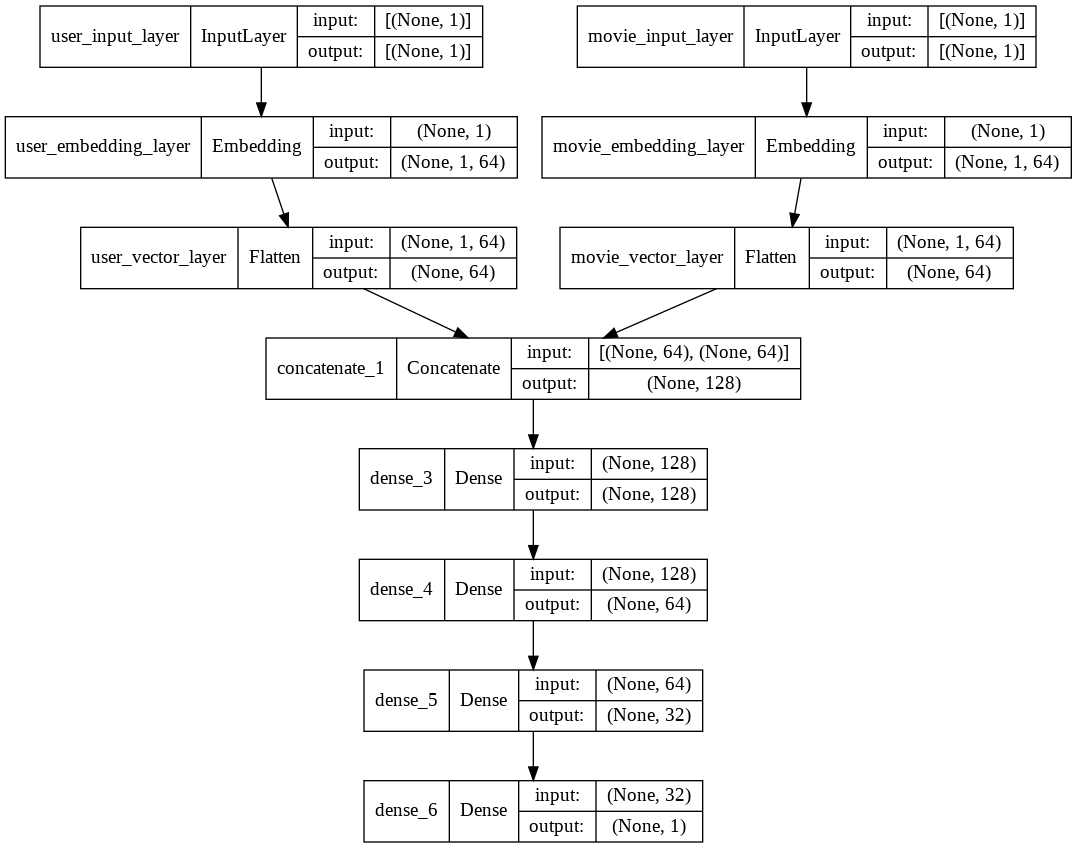

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
type(train_user_input), type(train_overview_input), type(train_movie_input), type(y_train)

(pandas.core.series.Series, list, pandas.core.series.Series, numpy.ndarray)

In [ ]:
history = model.fit([train_user_input, train_movie_input], y_train, epochs=20, verbose=1)


Epoch 1/20
2850/2850 [==============================] - 27s 9ms/step - loss: 0.2483 - mse: 0.2483
Epoch 2/20
2850/2850 [==============================] - 26s 9ms/step - loss: 0.2489 - mse: 0.2489
Epoch 3/20
2850/2850 [==============================] - 26s 9ms/step - loss: 0.2466 - mse: 0.2466
Epoch 4/20
2850/2850 [==============================] - 26s 9ms/step - loss: 0.2453 - mse: 0.2453
Epoch 5/20
2850/2850 [==============================] - 26s 9ms/step - loss: 0.2440 - mse: 0.2440
Epoch 6/20
2850/2850 [==============================] - 26s 9ms/step - loss: 0.2432 - mse: 0.2432
Epoch 7/20
2850/2850 [==============================] - 26s 9ms/step - loss: 0.2420 - mse: 0.2420
Epoch 8/20
2850/2850 [==============================] - 26s 9ms/step - loss: 0.2413 - mse: 0.2413
Epoch 9/20
2850/2850 [==============================] - 26s 9ms/step - loss: 0.2406 - mse: 0.2406
Epoch 10/20
2850/2850 [==============================] - 26s 9ms/step - loss: 0.2397 - mse: 0.2397
Epoch 11/20
2850/28

Text(0, 0.5, 'mse')

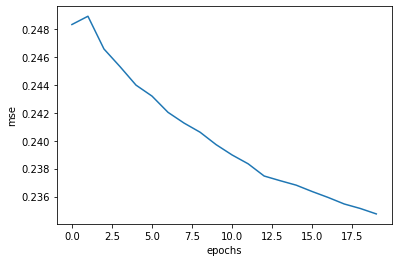

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('mse')

In [ ]:
model.evaluate([test_user_input, test_movie_input], y_test)


713/713 [==============================] - 2s 3ms/step - loss: 1.0553 - mse: 1.0553 - accuracy: 0.0347


[1.0553487539291382, 1.0553487539291382, 0.0347021147608757]

In [ ]:
from sklearn.metrics import r2_score

predictions = model.predict([test_user_input, test_movie_input])

f2_y_predict = r2_score(y_test, predictions)
print("R2 :", f2_y_predict)

R2 : 0.07004090221938863
